# GRO620 - Activité procédurale 3

In [7]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive

## Filtrage linéaire - suite

### Q1.1

Soit cette image :

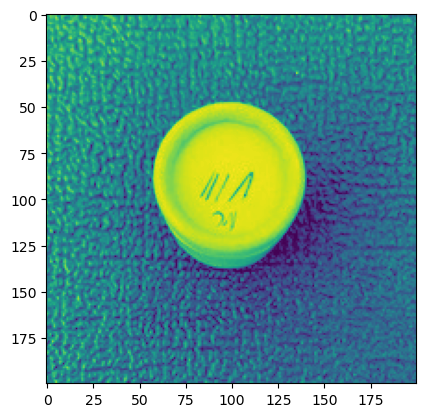

In [8]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono)

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

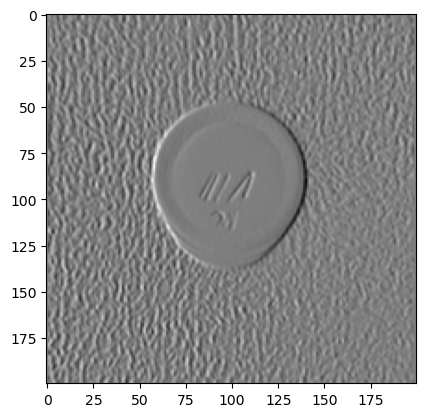

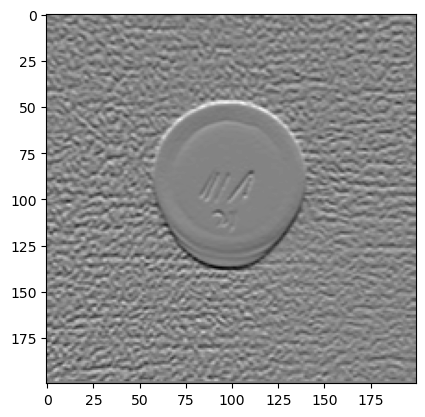

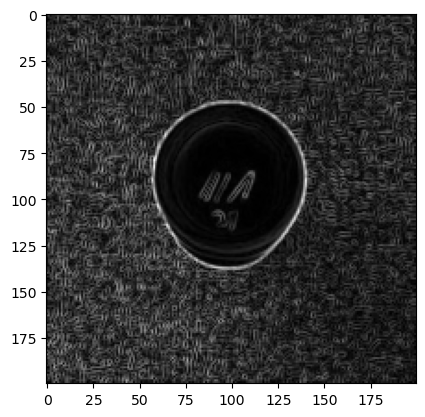

In [9]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)

img_sob_x = cv2.filter2D(img_q11_mono, -1, sobel)
plt.figure()
plt.imshow(img_sob_x, cmap ="gray")
img_2x = img_sob_x**2

img_sob_y = cv2.filter2D(img_q11_mono, -1, np.transpose(sobel))
plt.figure()
plt.imshow(img_sob_y, cmap ="gray")
img_2y = img_sob_y**2

img_xy = img_2x+img_2y
img_comb = np.sqrt(img_xy)

plt.figure()
plt.imshow(img_comb, cmap ="gray")

#On doit d'abord vérifier si on a des valeur de pixel entre 0 et 1, ensuite on multiplie les valeurs de la matrice par 255
#ca devrait marcher ensuite
# ret, threshold_img = cv2.threshold(img_comb, 230, 255, cv2.THRESH_BINARY)
# plt.figure()
# plt.imshow(threshold_img, cmap ="gray")


## Filtrage non-linéaire

### Q2.1

Soit cette image :

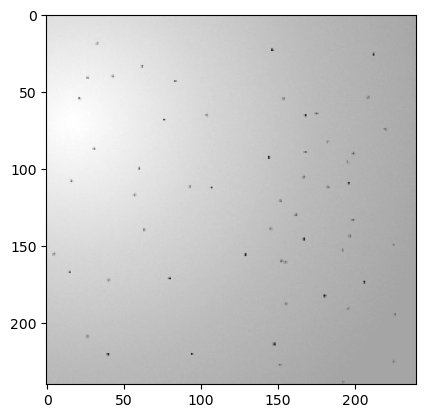

In [10]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)
plt.imshow(img_q21_mono, cmap="gray")

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

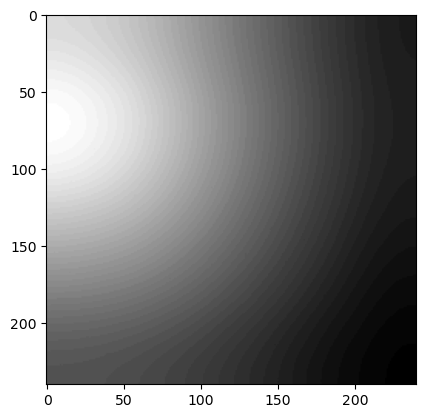

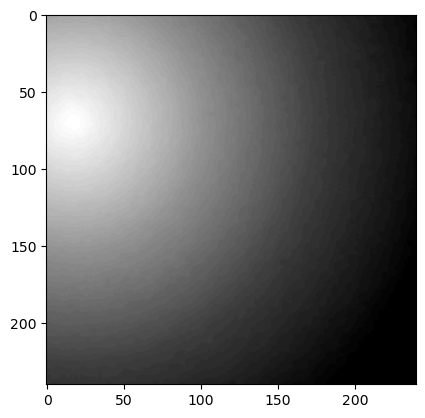

In [35]:
img_q21_filt = img_q21_mono.copy()
d = 100
sigma_col = 100
sigma_sp = 100

img_filt = cv2.bilateralFilter(img_q21_filt, d, sigma_col, sigma_sp)
plt.figure()
plt.imshow(img_filt, cmap ="gray")

img_medBlur = cv2.medianBlur(img_q21_filt, 5)
plt.figure()
plt.imshow(img_medBlur, cmap ="gray")

## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

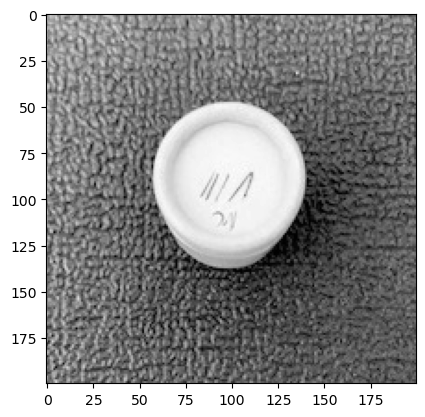

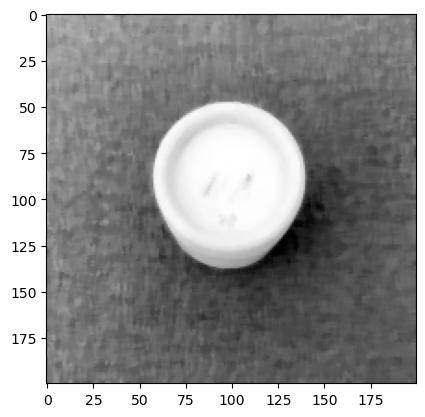

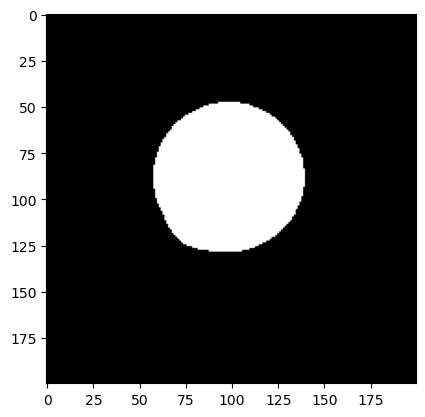

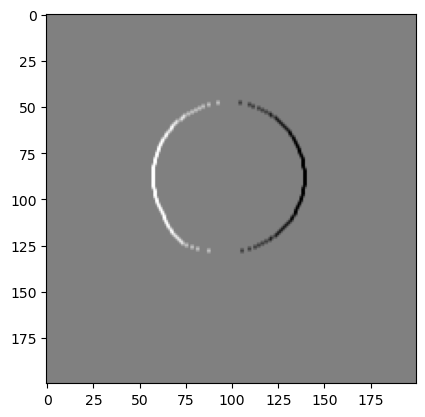

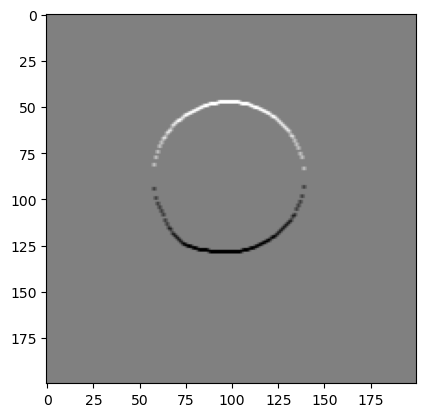

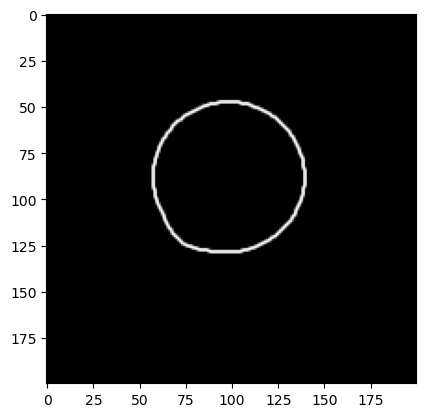

In [11]:
img_q31 = img_q11_mono
# plt.figure()
# plt.imshow(img_q31, cmap="gray")

# img_sob_x = cv2.filter2D(img_q31, -1, sobel)
# plt.figure()
# plt.imshow(img_sob_x, cmap ="gray")
# img_2x = img_sob_x**2

# img_sob_y = cv2.filter2D(img_q31, -1, np.transpose(sobel))
# plt.figure()
# plt.imshow(img_sob_y, cmap ="gray")
# img_2y = img_sob_y**2

# img_xy = img_2x+img_2y
# img_comb = np.sqrt(img_xynl)

# plt.figure()
# plt.imshow(img_comb, cmap ="gray")

# img_nl = cv2.medianBlur(img_comb, 5)
# plt.figure()
# plt.imshow(img_nl, cmap ="gray")

# ret, threshold_img = cv2.threshold(img_nl, 0.60, 255, cv2.THRESH_BINARY)
# plt.figure()
# plt.imshow(threshold_img, cmap ="gray")

plt.figure()
plt.imshow(img_q31, cmap="gray")

img_nl = cv2.medianBlur(img_q31, 5)
plt.figure()
plt.imshow(img_nl, cmap ="gray")

ret, threshold_img = cv2.threshold(img_nl, 0.67, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(threshold_img, cmap ="gray")

img_sob_x = cv2.filter2D(threshold_img, -1, sobel)
plt.figure()
plt.imshow(img_sob_x, cmap ="gray")
img_2x = img_sob_x**2

img_sob_y = cv2.filter2D(threshold_img, -1, np.transpose(sobel))
plt.figure()
plt.imshow(img_sob_y, cmap ="gray")
img_2y = img_sob_y**2

img_xy = img_2x+img_2y
img_comb = np.sqrt(img_xy)

plt.figure()
plt.imshow(img_comb, cmap ="gray")





### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

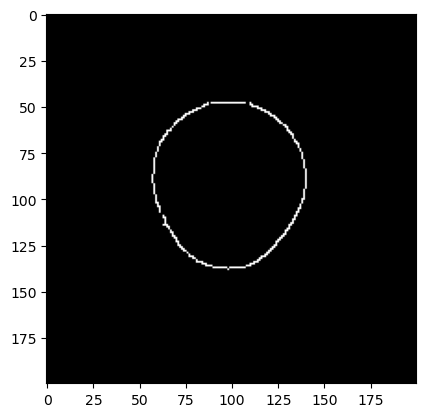

In [59]:
img_q32 = img_q11_org
img_can = cv2.Canny(img_q32, 450,670)

plt.figure()
plt.imshow(img_can, cmap ="gray")


## Analyse de formes

### Q4.1

Soit cette image :

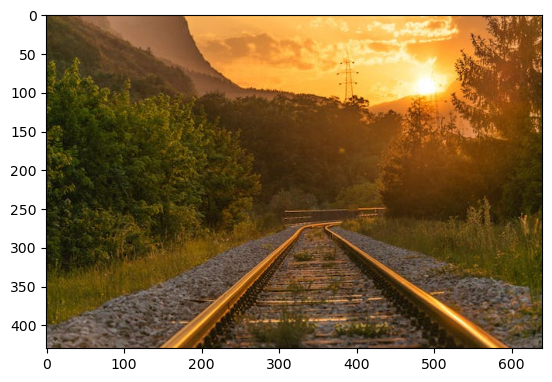

In [12]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

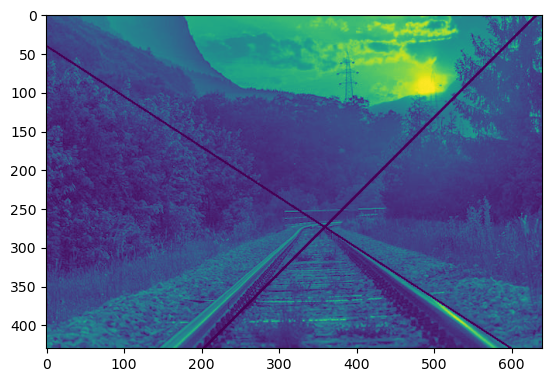

In [13]:
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_q41_mono,50,150,apertureSize = 3)
plt.imshow(edges)
lines = cv2.HoughLines(edges,1,np.pi/180,255)

for line in lines:
 rho,theta = line[0]
 a = np.cos(theta)
 b = np.sin(theta)
 x0 = a*rho
 y0 = b*rho
 x1 = int(x0 + 1000*(-b))
 y1 = int(y0 + 1000*(a))
 x2 = int(x0 - 1000*(-b))
 y2 = int(y0 - 1000*(a))
 cv2.line(img_q41_mono,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img_q41_mono)

# on peut aussi utiliser la fonction HoughLinesP, pour qu'il fasse une estimation de la longueur des lignes aussi


### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

In [10]:
img_q42_in = img_q11_mono

img_q42_out = img_q11_org.copy() # Pour le résultat
